In [199]:
%matplotlib inline

from modsim import *

from random import random


In [200]:
init = State(Susceptible=349, Infected=1, Removed=0, Recovered=0) 
    


In [201]:
def make_system():
    
    init = State(Susceptible=349, Infected=1, Removed=0, Recovered=0)
    infected=init.Infected
    recovered=init.Recovered
    removed=init.Removed
    susceptible=init.Susceptible
   
    init_infection_exit = State(new_susceptible=0, new_infected=0, new_recovered=0, new_removed=0)
    
    t0=0
    t_end=98
    
   
    system = System(t0=t0, t_end=t_end, init=init, init_infection_exit=init_infection_exit,
                   susceptible=susceptible, infected=infected, recovered=recovered, removed=removed)
    
    return system

In [202]:
system = make_system()

In [203]:
system

,value
t0,0
t_end,98
init,Susceptible 349 Infected 1 Removed ...
init_infection_exit,new_susceptible 0 new_infected 0 new_...
susceptible,349
infected,1
recovered,0
removed,0


In [204]:
def update2 (state, state2, system):
    
    s, i, rd, r = state
    
    ns, ni, nr, nrd = state2

    # print(system.susceptible)
    for g in range(system.susceptible):
        r = random()
        if (r <= 0.33):
            ni += 1
        else:
            ns += 1
            
   
    # print(system.infected)
   
    for k in range(system.infected):
        r = random()
        if (r <= 0.74):
            ni += 1
        elif (r <= 0.29):
            nr += 1
        else:
            nrd += 1
        
    for l in range(system.recovered):
        r = random()
        if (r <= 0.995):
            nr += 1
        else:
            ni += 1
            
    system.susceptible = ns
    system.infected = ni
    system.removed += nrd
    system.recovered = nr

    init = State(Susceptible=system.susceptible, Infected=system.infected, Removed=system.removed, Recovered=system.recovered)
    return init

In [205]:
check_update = update2(init, system.init_infection_exit, system)
check_update

,value
Susceptible,235
Infected,115
Removed,0
Recovered,0


In [206]:
check_update

,value
Susceptible,235
Infected,115
Removed,0
Recovered,0


In [207]:
def run_simulation(system,update2):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    
    for i in linrange(system.t0, system.t_end):
        frame.loc[i+1] = update2(frame.loc[i], system.init_infection_exit, system)
        
    system.results = frame

In [208]:
run_simulation(system,update2)

In [209]:
system.results.head()

,Susceptible,Infected,Removed,Recovered
0,349.0,1.0,0.0,0.0
1,152.0,165.0,33.0,0.0
2,104.0,171.0,75.0,0.0
3,71.0,161.0,118.0,0.0
4,45.0,151.0,154.0,0.0


In [210]:
def plot_results(S, I, Rd, R):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(Rd, ':', color='green', label='Removed')
    plot(R, '*-', color='purple', label='Recovered')
    
    decorate(xlabel='Time (days)', ylabel='Population')

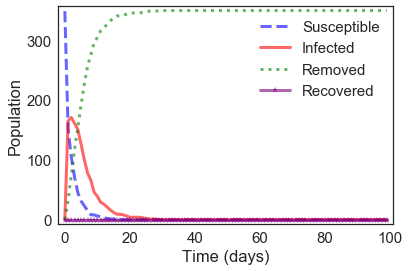

In [211]:
frame = system.results
plot_results(frame.Susceptible, frame.Infected, frame.Removed, frame.Recovered)

In [ ]:
def add_immunization(system,total):
    system.init.susceptible -= total
    system.init.recovered +=total